### Importing some basic libraries

In [1]:
import os
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
import datetime
from sklearn.metrics import confusion_matrix
import pandas as pd

from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.efficientnet import preprocess_input

pd.options.display.max_columns=60
tf.get_logger().setLevel('ERROR')


### Importing two data sets:

- 'df_status' contains data from ICUN with information about the protection status of birds.
- 'df_lp' contains data with information about image paths and their corresponding set (train, valid, test).

###### Join will be done  based on the scientific name because it is unique to each species and can be used to merge both data frames.

In [2]:

df_status = pd.read_csv(r"C:\Users\Data\Documents\git\JDSZR11-chubs_chubs\Birds Image Clasification\IUCN\assessments.csv")

In [3]:
df_lp = pd.read_csv(r"C:\Users\Data\Documents\git\JDSZR11-chubs_chubs\Birds Image Clasification\archive (1)\birds.csv")

In [4]:
df_lp.head()

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [5]:
df_status.head()

,assessmentId,internalTaxonId,scientificName,redlistCategory,redlistCriteria,yearPublished,assessmentDate,criteriaVersion,language,rationale,habitat,threats,population,populationTrend,range,useTrade,systems,conservationActions,realm,yearLastSeen,possiblyExtinct,possiblyExtinctInTheWild,scopes
0,84694321,22679393,Polyplectron schleiermacheri,Endangered,C2a(i),2016,2016-10-01 00:00:00 UTC,3.1,English,This elusive species's status is difficult to ...,Its ecological needs are poorly understood. An...,"In central Kalimantan, habitat loss, degradati...","The population is estimated to number 1,000-2,...",Decreasing,<em>Polyplectron schleiermacheri</em> is endem...,NaN,Terrestrial,<strong>Conservation Actions Underway</strong>...,Indomalayan,NaN,False,False,Global
1,89641304,22720960,Emberiza rustica,Vulnerable,A2abcd+3bcd+4abcd,2016,2016-10-01 00:00:00 UTC,3.1,English,This species has been uplisted to Vulnerable a...,The species breeds in swampy lowland spruce (<...,The numbers of this species have declined in t...,"The European population is estimated at 681,00...",Decreasing,This bunting breeds across northern latitudes ...,NaN,Terrestrial|Freshwater (=Inland waters),<strong>Conservation and research actions unde...,Indomalayan|Nearctic|Palearctic,NaN,False,False,Global
2,90341807,22728245,Chlamydotis undulata,Vulnerable,A2cd+3cd+4cd,2016,2016-10-01 00:00:00 UTC,3.1,English,This recently split species is listed as Vulne...,It inhabits sandy and stony semi-desert and is...,"The principal threat is from hunting, which ha...","In the mid-1990s, this species's population wa...",Decreasing,This species&#160;occurs across a wide range i...,NaN,Terrestrial,<strong>Conservation Actions Underway</strong>...,Afrotropical|Palearctic,NaN,False,False,Global
3,92761019,22678194,Crypturellus kerriae,Vulnerable,"B1ab(i,ii,iii,v);C2a(i)",2016,2016-10-01 00:00:00 UTC,3.1,English,This species is Vulnerable because it is known...,It occurs in humid primary forest. The known s...,Vast areas of seemingly suitable habitat remai...,"The population is estimated to number 2,500-9,...",Decreasing,<em>Crypturellus kerriae</em> is a poorly-know...,NaN,Terrestrial,<strong>Conservation Actions Underway</strong>...,Neotropical,NaN,False,False,Global
4,92761578,22678217,Crypturellus noctivagus,Near Threatened,A2cd+3cd+4cd,2016,2016-10-01 00:00:00 UTC,3.1,English,This species is classified as Near Threatened ...,"It occurs in caatinga and Atlantic forest, par...",It suffers from widespread and continuing habi...,The global population size has not been quanti...,Decreasing,<em>Crypterellus noctivagus</em> is rare to lo...,NaN,Terrestrial,<strong>Conservation Actions Underway</strong>...,Neotropical,NaN,False,False,Global


In [6]:
## Adjusting name of columns to scientificName for unifying

df_lp = df_lp.rename(columns={'scientific name' : 'scientificName'})
df_lp['scientificName'] = df_lp['scientificName'].apply(lambda  x : x.lower())
df_status['scientificName'] = df_status['scientificName'].apply(lambda  x : x.lower())

In [7]:
df_status = df_status.set_index(['scientificName'])

In [8]:
df = df_lp.join(df_status,on='scientificName')

In [9]:
df_train = df[df['data set'] == 'train'].copy()
df_test = df[df['data set'] == 'test'].copy()
df_valid = df[df['data set'] == 'valid'].copy()

In [10]:
df_train


,class id,filepaths,labels,data set,scientificName,assessmentId,internalTaxonId,redlistCategory,redlistCriteria,yearPublished,assessmentDate,criteriaVersion,language,rationale,habitat,threats,population,populationTrend,range,useTrade,systems,conservationActions,realm,yearLastSeen,possiblyExtinct,possiblyExtinctInTheWild,scopes
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84630,524.0,train/BLACK BREASTED PUFFBIRD/151.jpg,BLACK BREASTED PUFFBIRD,train,notharchus pectoralis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84631,524.0,train/BLACK BREASTED PUFFBIRD/152.jpg,BLACK BREASTED PUFFBIRD,train,notharchus pectoralis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84632,524.0,train/BLACK BREASTED PUFFBIRD/153.jpg,BLACK BREASTED PUFFBIRD,train,notharchus pectoralis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84633,524.0,train/BLACK BREASTED PUFFBIRD/146.jpg,BLACK BREASTED PUFFBIRD,train,notharchus pectoralis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Droping unwated columns

list_col = list(df.iloc[:,8:].columns) + ['assessmentId','internalTaxonId']
df = df.drop(columns=list_col)

In [12]:
class_names_train = df['labels'].unique()

In [13]:
class_names_train = OneHotEncoder().fit_transform(class_names_train.reshape(-1,1)).toarray()

In [14]:
df

,class id,filepaths,labels,data set,scientificName,redlistCategory
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,malacocincla abbotti,NaN
...,...,...,...,...,...,...
89880,524.0,valid/BLACK BREASTED PUFFBIRD/3.jpg,BLACK BREASTED PUFFBIRD,valid,notharchus pectoralis,NaN
89881,524.0,valid/BLACK BREASTED PUFFBIRD/4.jpg,BLACK BREASTED PUFFBIRD,valid,notharchus pectoralis,NaN
89882,524.0,valid/BLACK BREASTED PUFFBIRD/1.jpg,BLACK BREASTED PUFFBIRD,valid,notharchus pectoralis,NaN
89883,524.0,valid/BLACK BREASTED PUFFBIRD/2.jpg,BLACK BREASTED PUFFBIRD,valid,notharchus pectoralis,NaN


### Loading from directory datasets: train, test, valid

In [294]:
train = tf.keras.utils.image_dataset_from_directory(
    directory=r'archive (1)\train',
    labels="inferred", # geting names from labels as the name of folder
    label_mode="categorical", # type of labels
    class_names=None,
    color_mode="rgb",
    image_size=(224, 224),
    batch_size=32,
    seed=42,
    validation_split=None,
    subset=None,
    follow_links=False,
    crop_to_aspect_ratio=False,
)
test = tf.keras.utils.image_dataset_from_directory(
    
    directory=r'archive (1)\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    image_size=(224, 224),
    batch_size=32,
    seed=42,
    validation_split=None,
    subset=None,
    follow_links=False,
    crop_to_aspect_ratio=False,
    shuffle = None
)
valid = tf.keras.utils.image_dataset_from_directory(
    directory=r'archive (1)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    image_size=(224, 224),
    batch_size=32,
    seed=42,
    validation_split=None,
    subset=None,
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


##### Cheking images and thier names

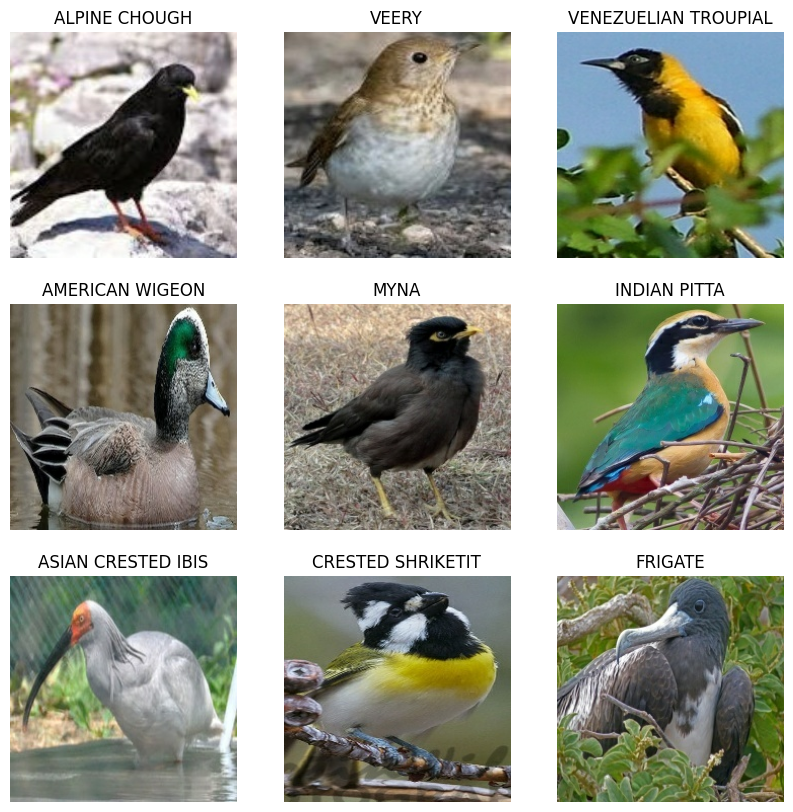

In [16]:
class_names = train.class_names
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

### Resizing, rescaling images and data augumentaton using preprocessing layers
- with demostration of end result of prerocessing of picutre 
- used later as part of model to make more pictures

In [295]:
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224, 224),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomContrast(0.2),
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


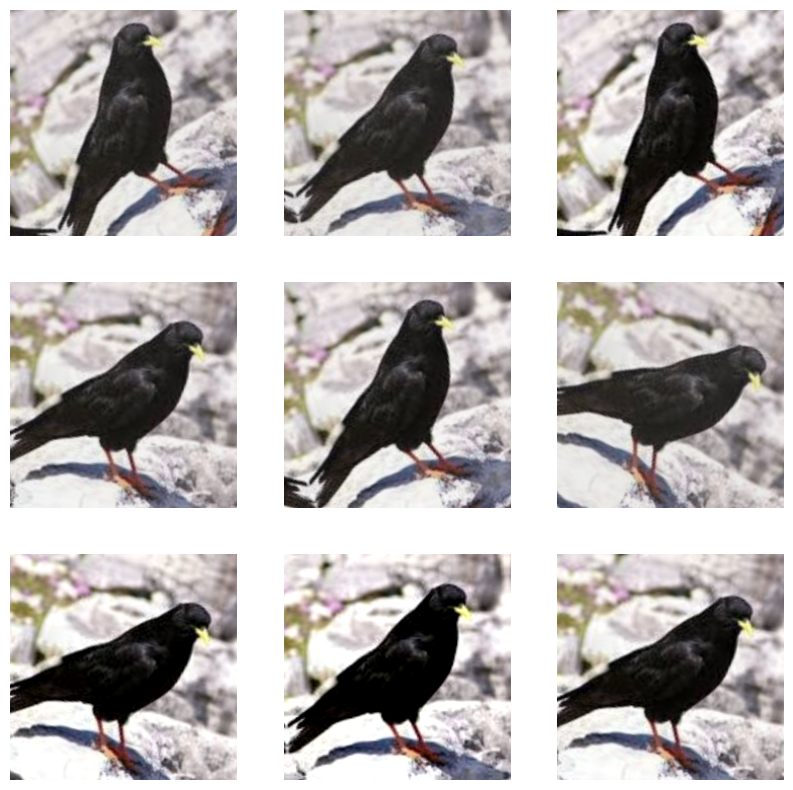

In [296]:
for images, labels in train.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = augment(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.axis("off")

### Transfer learning - model EfficientNetB0 

In [43]:
pretrained_model = tf.keras.applications.efficientnet.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max',
)

pretrained_model.trainable = False

##### Adding all parts of  model

In [44]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = augment(inputs)

x = pretrained_model(x,training=False)


x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.20)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.20)(x)
outputs = tf.keras.layers.Dense(525, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

### Training the model

In [45]:
patience = 5

es_callback = tf.keras.callbacks.EarlyStopping(patience=patience)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['categorical_accuracy']
)

In [ ]:
log_dir = os.path.join("logs", "bird", "our-cnn", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [46]:
history = model.fit(
  train,
  batch_size = 32,
  validation_data=valid,
  epochs=100,
  callbacks=[tensorboard_callback,es_callback]
)

Epoch 1/100


KeyboardInterrupt: 

In [ ]:
# saving model so for now commeted out
# model.save('saved_model/bird_test_case_5_d02.h5')

### Load model for test set

In [19]:
new_model = tf.keras.models.load_model('saved_model/bird_test_case_5_d02.h5')

### Getting prediction values from loaded model

In [297]:
y_pred = new_model.predict(test)

### Geting labels and status for aplication

In [476]:
class_status = df.copy()
class_status = class_status[['labels','redlistCategory']].drop_duplicates()
class_status = class_status.fillna('Not in Threat')
class_status

,labels,redlistCategory
0,ABBOTTS BABBLER,Not in Threat
163,ABBOTTS BOOBY,Endangered
343,ABYSSINIAN GROUND HORNBILL,Vulnerable
522,AFRICAN CROWNED CRANE,Endangered
657,AFRICAN EMERALD CUCKOO,Not in Threat
...,...,...
83690,DUNLIN,Not in Threat
83880,SNOWY SHEATHBILL,Not in Threat
84067,KNOB BILLED DUCK,Not in Threat
84264,GREY HEADED CHACHALACA,Not in Threat


In [477]:
status = class_status.iloc[:,1]


In [478]:
(class_status.iloc[:,1] == status).sum() # cheking if order is preservd

525

In [479]:
class_names = test.class_names # geting labels that they will be in proper order


In [480]:
# saving 2 files for app solution
np.save(file = 'brids_status', arr =status,allow_pickle=True) 
np.save('brids_class.npy',arr = class_names,allow_pickle=True)

## Extraction from batch base on test data to check picture name and predicted name

In [312]:
tmp_1 =[]
for batch in test:
    tmp=batch
    tmp_1.append(tmp)
   


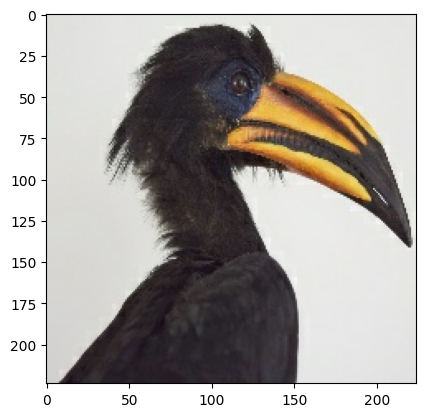

In [457]:
plt.imshow(tmp_1[1][0][3].numpy().astype("uint8"))

In [461]:
class_names[np.argmax(tmp_1[1][1][3])]

'AFRICAN PIED HORNBILL'

### This checkout only if there is batch in loding data if not rember of change of braces

- tmp_1[0][1][3] class
- tmp_1[0][0][3] image
- tmp_1[x][y][z] x number of batch - y 0 for image 1 for class - z number of picture

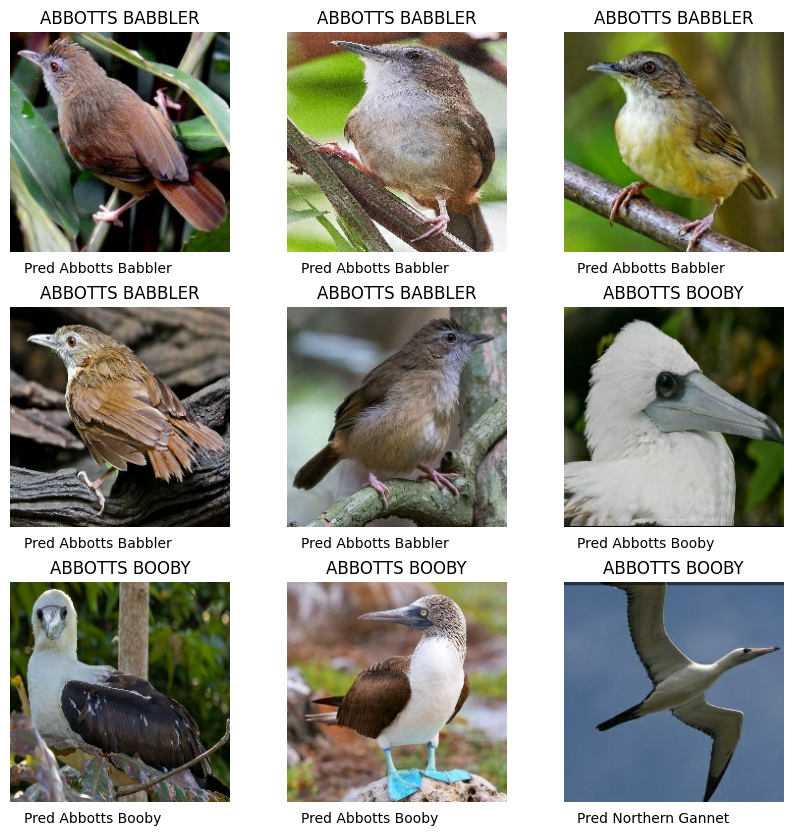

In [469]:
plt.figure(figsize=(10,10))
for i in range (9):
    ax = plt.subplot(3, 3, i + 1)
    position = np.argmax(tmp_1[0][1][i])
    plt.imshow(tmp_1[0][0][i].numpy().astype("uint8"))
    plt.title(class_names[position])
    plt.subplots_adjust(wspace=0.25, hspace=0.25)
    plt.annotate(text = 'Pred ' + (class_names[y_pred[i].argmax()]).title() , xy=(10,-15),xycoords ='axes points' )
    plt.axis('off')
    

## Cheking logic for aplication seting

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.efficientnet import preprocess_input
from keras.models import load_model

In [ ]:
image_path = os.path.join(r'C:\Users\Data\Documents\git\JDSZR11-chubs_chubs\Birds Image Clasification\archive (1)\test\CHATTERING LORY\1.jpg')

In [ ]:
class_names = np.load('brids_class.npy',allow_pickle=True) # loading files for testing of logic in app solution
status = np.load('brids_status.npy',allow_pickle=True)

In [ ]:
image =  load_img(image_path, target_size=(224,224))                    # resize image
image = img_to_array(image)                                             # image to array
image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2])) # reshape of array
image = preprocess_input(image)                                         # preproces of image ofr model
yhat = new_model.predict(image)                                         # calling loded model to application and making prediction base on loaded image
position = np.argmax(yhat)                                              # geting position of name base on max prediction
label = class_names[position].title()                                   # decoding names
status = status[position]                                               # decoding status of bird
value = yhat.max()                                                      # how certin is model
classification = '%s %s (%.8f%%)' % (label,status,value*100)            # making string from earlier extracted informations
classification

'Chattering Lory Not in Threat (99.95236397%)'

### podejrzenie widoku tensorboard'a

1. Wewnątrz jupyter notebook'a\
```%load_ext tensorboard```

2. Uruchomienie serwera, jeżeli z poziomu notebooka nie działa, to należy uruchomić z cmd\
```tensorboard --logdir "logs"```